# Analyses prédictives sur les étiquettes DPE des logements en Bretagne

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd

df_existents = pd.read_csv("../data/existents.csv", sep=",")
df_existents.info()

C:\Users\Evidya\AppData\Local\Temp\ipykernel_50440\1015103065.py:3: DtypeWarning: Columns (159,191,202,208,214,215,218,219,220,221,228,232) have mixed types. Specify dtype option on import or set low_memory=False.
  df_existents = pd.read_csv("../data/existents.csv", sep=",")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398114 entries, 0 to 398113
Columns: 235 entries, Conso_chauffage_dépensier_é_finale to Facteur_couverture_solaire_saisi_installation_chauffage_n°1
dtypes: float64(133), int64(4), object(98)
memory usage: 713.8+ MB


In [4]:
df_existents.shape

(398114, 235)

In [5]:
df_new = pd.read_csv("../data/neufs.csv", sep=",")
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59213 entries, 0 to 59212
Columns: 135 entries, Conso_chauffage_dépensier_é_finale to Surface_tertiaire_immeuble
dtypes: float64(77), int64(4), object(54)
memory usage: 61.0+ MB


C:\Users\Evidya\AppData\Local\Temp\ipykernel_50440\3324510021.py:1: DtypeWarning: Columns (80,100,111,112,132,133) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new = pd.read_csv("../data/neufs.csv", sep=",")


In [6]:
df_new.shape

(59213, 135)

## Statistiques générales

In [7]:
df_existents.describe(exclude="object")

,Conso_chauffage_dépensier_é_finale,Volume_stockage_générateur_ECS_n°1,Conso_é_finale_installation_ECS,Emission_GES_chauffage,Conso_ECS_é_finale_énergie_n°2,Conso_ECS_é_finale_énergie_n°1,Conso_chauffage_dépensier_installation_chauffage_n°1,Coût_total_5_usages,Conso_é_finale_dépensier_installation_ECS,Surface_chauffée_installation_chauffage_n°1,...,Conso_chauffage_générateur_n°2_installation_n°2,Conso_chauffage_dépensier_générateur_n°2_installation_n°2,Conso_refroidissement_dépensier_annuel,Conso_refroidissement_annuel,Surface_climatisée,Electricité_PV_autoconsommée,Surface_tertiaire_immeuble,Facteur_couverture_solaire_installation_chauffage_n°2,Facteur_couverture_solaire_saisi,Facteur_couverture_solaire_saisi_installation_chauffage_n°1
count,3.980900e+05,374294.000000,3.744230e+05,398090.000000,246580.000000,3.981120e+05,3.757690e+05,398087.000000,3.744230e+05,375794.000000,...,2346.000000,2346.000000,2590.000000,2590.000000,3150.000000,11326.000000,712.000000,1.700000e+01,261.000000,9.000000
mean,1.330597e+04,161.145758,7.733003e+03,1770.934162,501.200281,2.198774e+03,3.039872e+04,1565.539553,1.059323e+04,203.363176,...,1852.769906,2374.595695,747.754131,166.217104,82.593143,4.485246,184.969522,3.000000e-01,0.598467,0.233333
std,2.751411e+04,482.306882,3.366064e+04,4488.107087,3212.540172,7.070617e+03,1.051978e+05,2827.479727,4.706600e+04,672.606841,...,1600.359693,2016.316963,1402.858299,302.611003,60.567949,75.614302,254.245767,5.721958e-17,0.222221,0.320156
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e-01,16.400000,0.000000e+00,0.800000,...,0.100000,0.000000,0.500000,0.200000,1.000000,0.000000,1.000000,3.000000e-01,0.000000,0.000000
25%,3.984950e+03,0.000000,1.575800e+03,252.400000,0.000000,1.419900e+03,3.912100e+03,773.000000,2.052000e+03,49.800000,...,932.675000,1212.625000,74.800000,26.900000,43.825000,1.000000,54.575000,3.000000e-01,0.500000,0.000000
50%,7.978750e+03,100.000000,1.894100e+03,621.000000,0.000000,1.822900e+03,8.074300e+03,1138.800000,2.450100e+03,71.800000,...,1552.450000,2001.900000,143.750000,53.600000,72.000000,1.000000,75.000000,3.000000e-01,0.500000,0.200000
75%,1.599862e+04,200.000000,2.221800e+03,1777.275000,0.000000,2.167825e+03,1.775170e+04,1737.000000,2.854900e+03,105.000000,...,2330.975000,3007.850000,488.825000,153.050000,108.000000,1.000000,116.125000,3.000000e-01,0.700000,0.300000
max,4.243116e+06,12000.000000,1.076603e+06,562443.900000,602419.200000,1.076603e+06,4.243116e+06,355329.300000,1.518780e+06,16269.500000,...,27209.400000,33692.900000,19736.600000,8250.200000,1495.000000,2826.000000,756.000000,3.000000e-01,1.000000,1.000000


In [8]:
df_existents.describe(include="object")

,Nom__commune_(BAN),Besoin_refroidissement,Configuration_installation_chauffage_n°1,Configuration_installation_ECS,Type_installation_chauffage_n°1,Type_installation_ECS_(général),Date_installation_générateur_ECS_n°1,Usage_générateur_ECS_n°1,Adresse_(BAN),Date_visite_diagnostiqueur,...,Typologie_logement,Description_générateur_chauffage_n°2_installation_n°2,Type_générateur_n°2_installation_n°2,Usage_générateur_n°2_installation_n°2,Type_énergie_générateur_n°2_installation_n°2,Type_générateur_froid,Période_installation_générateur_froid,Type_énergie_climatisation,Cage_d'escalier,Invariant_fiscal_logement
count,398114,395290,375794,374427,375794,213672,64682,374427,397554,398114,...,32627,2346,2346,2346,2346,3150,3150,2017,396,3218
unique,1576,2930,11,3,4,3,3,3,208331,1172,...,7,105,66,2,7,16,3,3,86,120
top,Rennes,0,Installation de chauffage simple,Un seul système d'ECS sans solaire,installation individuelle,individuel,Avant 2010,ecs,10 Lieu Dit la Haie 35120 Roz-Landrieux,2024-03-27,...,T3,Bois - Poêle à bois (bûche) installé de 2007 à...,Poêle bûche installé installé de 2007 à 2017 a...,chauffage,Bois – Bûches,PAC air/air installée à partir de 2015,A partir de 2015,Électricité,B,NR
freq,47194,391993,327121,367104,326448,178421,33425,214864,1008,1861,...,9652,221,252,2299,1677,1137,1491,2014,58,1251


## Traitement des données

### logements anciens

In [9]:
pourcentage_manquant = df_existents.isnull().mean() * 100

colonnes_a_fort_taux_manquant = pourcentage_manquant[pourcentage_manquant > 40.0].index.tolist()

# Suppression les colonnes ayant plus de 40% de valeurs manquantes
df_existents = df_existents.drop(columns=colonnes_a_fort_taux_manquant)

In [10]:
df_existents["Type_logement"] = "ancien"

### Logements neufs

In [11]:
pourcentage_manquant = df_new.isnull().mean() * 100

colonnes_a_fort_taux_manquant = pourcentage_manquant[pourcentage_manquant > 40.0].index.tolist()


df_new = df_new.drop(columns=colonnes_a_fort_taux_manquant)

In [12]:
# Création de la colonne Année_construction pour les logements neufs

# Convertion de la colonne "Date_réception_DPE" au format datetime
df_new["Date_réception_DPE"] = pd.to_datetime(df_new["Date_réception_DPE"], errors='coerce')

df_new["Année_construction"] = df_new["Date_réception_DPE"].apply(lambda x : x.year)

#
df_new["Type_logement"] = "neuf"

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
df = pd.concat([df_existents, df_new], join="inner", ignore_index=True)
df = df.drop(columns=["_score", "_id", "Adresse_(BAN)", "Adresse_brute", 'Nom__rue_(BAN)', 'Nombre_niveau_logement', 'N°_département_(BAN)',
 'N°_région_(BAN)', 'Identifiant__BAN', '_rand', '_i'])
df.head(10)

,Conso_chauffage_dépensier_é_finale,Nom__commune_(BAN),Emission_GES_chauffage,Coût_total_5_usages,Coordonnée_cartographique_X_(BAN),Conso_5_usages_par_m²_é_primaire,Coût_refroidissement,Ubat_W/m²_K,Coût_ECS_dépensier,Emission_GES_auxiliaires,...,Coût_chauffage_énergie_n°1,Qualité_isolation_plancher_bas,Conso_5_usages/m²_é_finale,Hauteur_sous-plafond,Coût_auxiliaires,Conso_chauffage_dépensier_é_primaire,Code_INSEE_(BAN),Score_BAN,Conso_5_usages_é_primaire,Type_logement
0,27974.7,Saint-Brieuc,5880.4,3629.0,275006.07,243.0,0.0,2.22,562.0,14.0,...,3093.0,très bonne,212.6,2.7,43.0,27974.7,22278,0.73,27883.4,ancien
1,5399.0,Saint-Brieuc,319.3,1110.0,274123.91,226.0,0.0,3.05,419.0,0.0,...,695.0,très bonne,98.6,2.5,0.0,12417.7,22278,0.73,14864.8,ancien
2,10570.8,Saint-Brieuc,648.2,1759.0,274103.07,359.0,0.0,1.23,391.0,0.0,...,1364.0,bonne,156.1,2.5,0.0,24312.9,22278,0.72,24348.8,ancien
3,43968.3,Saint-Brieuc,9374.1,5520.0,275006.07,361.0,0.0,2.08,597.0,18.8,...,4930.0,insuffisante,326.5,2.7,56.0,43968.3,22278,0.73,41557.1,ancien
4,7775.3,Saint-Brieuc,467.2,1457.0,274127.13,268.0,0.0,1.95,457.0,0.0,...,995.0,très bonne,116.9,2.5,0.0,17883.2,22278,0.73,19918.6,ancien
5,12111.3,Saint-Brieuc,765.3,2062.1,274979.01,221.0,0.0,1.18,377.3,19.0,...,1597.0,insuffisante,96.0,2.6,48.9,22279.9,22278,0.76,28768.3,ancien
6,15465.8,Saint-Brieuc,3135.6,2176.0,275001.26,178.0,0.0,2.71,549.0,12.5,...,1649.0,très bonne,143.4,2.7,39.0,15465.8,22278,0.73,17658.1,ancien
7,9369.4,Saint-Brieuc,561.0,1655.0,274115.77,302.0,0.0,1.70,456.0,0.0,...,1185.0,très bonne,131.6,2.5,0.0,21549.7,22278,0.72,22797.7,ancien
8,4951.7,Saint-Brieuc,293.4,986.0,274123.91,275.0,0.0,2.17,349.0,0.0,...,646.0,très bonne,119.8,2.5,0.0,11388.8,22278,0.73,13024.2,ancien
9,20308.0,Saint-Brieuc,4214.7,2770.0,275001.26,200.0,0.0,2.42,583.0,12.9,...,2217.0,très bonne,166.7,2.7,40.0,20308.0,22278,0.73,22027.5,ancien


### Imputation des valeurs manquantes

In [15]:
mean_annee_construction = int(df['Année_construction'].mean())

# Remplacer les valeurs manquantes de 'Année_construction' par la moyenne
df['Année_construction'].fillna(mean_annee_construction, inplace=True)

C:\Users\Evidya\AppData\Local\Temp\ipykernel_50440\843089101.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Année_construction'].fillna(mean_annee_construction, inplace=True)


In [16]:
df['Surface_habitable_logement'].fillna(df['Surface_habitable_logement'].median(), inplace=True)

C:\Users\Evidya\AppData\Local\Temp\ipykernel_50440\646020327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Surface_habitable_logement'].fillna(df['Surface_habitable_logement'].median(), inplace=True)


In [17]:
df["Qualité_isolation_plancher_bas"].value_counts()

Qualité_isolation_plancher_bas
très bonne      164465
insuffisante    128982
bonne            94365
moyenne          54762
Name: count, dtype: int64

In [18]:
import numpy as np

distribution = df['Type_énergie_principale_chauffage'].value_counts(normalize=True)

# Remplacer les valeurs manquantes en tirant aléatoirement basé sur la distribution
df['Type_énergie_principale_chauffage'] = df['Type_énergie_principale_chauffage'].apply(
    lambda x: np.random.choice(distribution.index, p=distribution.values) if pd.isnull(x) else x
)

In [19]:
missing_rows_count = df.isnull().any(axis=1).sum()
missing_rows_count # on a très peu de lignes NA donc on peut les supprimer

np.int64(14867)

In [20]:
df.dropna(inplace=True)

## Sélection de variables

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matrice de corrélation réorganisée en blocs de couleur')

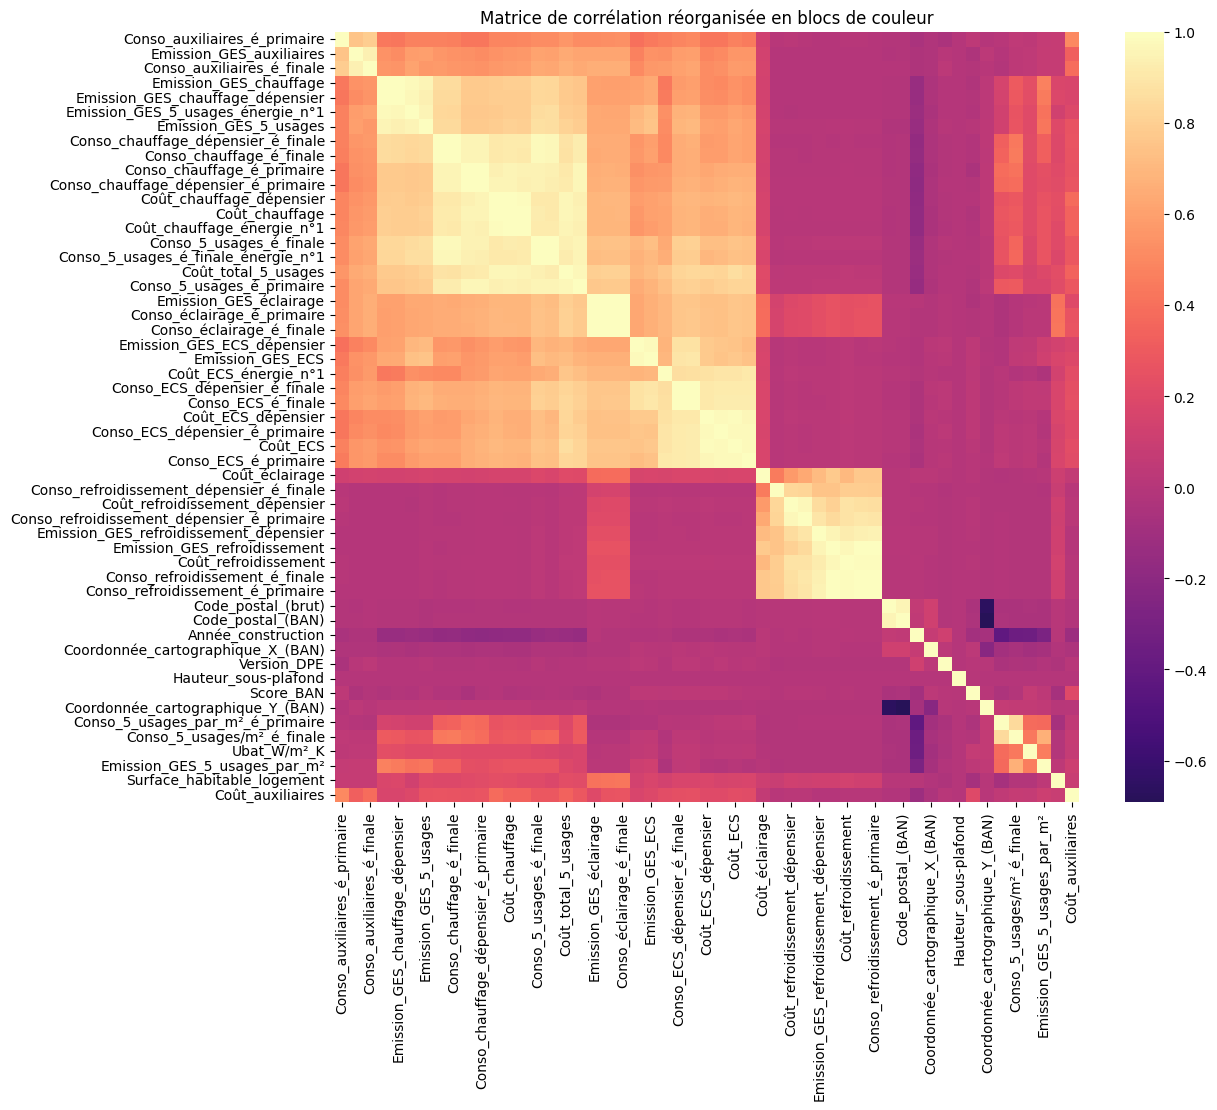

: 

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

df_quanti = df.select_dtypes(include="number")
corr_matrix = df_quanti.corr()

Z = linkage(corr_matrix, method='average')  # 'average' est une méthode courante pour les clusters
leaves_order = leaves_list(Z)  # Obtenir l'ordre des feuilles dans le dendrogramme

# Réorganiser la matrice de corrélation selon cet ordre
sorted_corr_matrix = corr_matrix.iloc[leaves_order, leaves_order]

# Visualiser la matrice de corrélation réorganisée
plt.figure(figsize=(12, 10))
sns.heatmap(sorted_corr_matrix, cmap="magma", center=0)
plt.title("Matrice de corrélation réorganisée en blocs de couleur")
plt.show()

